In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline

#VERİ SETİ TANIMLAMA ve GENEL BAKIŞ

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/My Drive/E-Commerce Clothing Reviews.xlsx')

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Department Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4.0,1.0,0.0,Intimate
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5.0,1.0,4.0,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3.0,0.0,0.0,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5.0,1.0,0.0,Bottoms
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5.0,1.0,6.0,Tops


In [5]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Department Name'],
      dtype='object')

Giyim kimliği için kaç farklı değer olduğunu kontrol edelim

In [6]:
df["Department Name"].value_counts()

Tops        206
Dresses      66
Bottoms      52
Jackets      31
Intimate     23
Trend         2
Name: Department Name, dtype: int64

In [7]:
df["Clothing ID"].value_counts()

895     31
862     26
836     20
1104    16
829     14
        ..
305      1
1025     1
815      1
1018     1
833      1
Name: Clothing ID, Length: 88, dtype: int64

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               385 non-null    int64  
 1   Clothing ID              385 non-null    int64  
 2   Age                      385 non-null    int64  
 3   Title                    306 non-null    object 
 4   Review Text              377 non-null    object 
 5   Rating                   380 non-null    float64
 6   Recommended IND          380 non-null    float64
 7   Positive Feedback Count  380 non-null    float64
 8   Department Name          380 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 27.2+ KB


Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                      79
Review Text                 8
Rating                      5
Recommended IND             5
Positive Feedback Count     5
Department Name             5
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)
print(df.isnull().sum())
df.shape

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Department Name            0
dtype: int64


<ipython-input-9-74178e2872e9>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Unnamed: 0'],1,inplace=True)


(301, 8)

In [10]:
print((df['Department Name'].value_counts()/(df['Department Name'].value_counts().sum()))*100)

Tops        53.820598
Dresses     15.946844
Bottoms     14.617940
Jackets      8.970100
Intimate     6.312292
Trend        0.332226
Name: Department Name, dtype: float64


<ipython-input-11-08e4831ff6ae>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


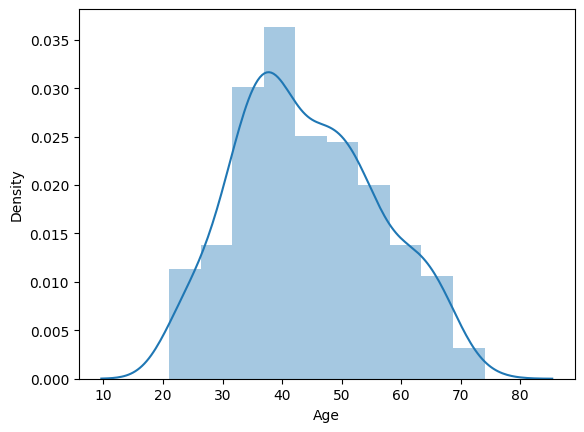

In [11]:
sns.distplot(df['Age'])
sns.set(rc={'figure.figsize':(10,10)})

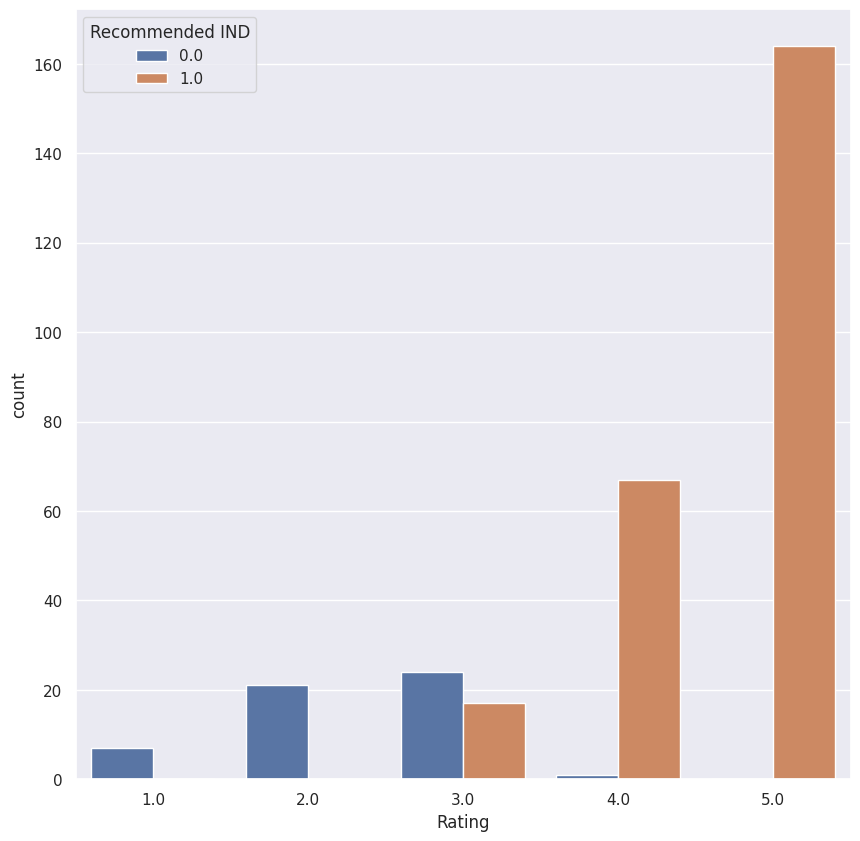

In [12]:
sns.countplot(x='Rating', hue='Recommended IND',data=df)
sns.set(rc={'figure.figsize':(10,20)})

In [13]:
df['Rating'].value_counts()

5.0    164
4.0     68
3.0     41
2.0     21
1.0      7
Name: Rating, dtype: int64

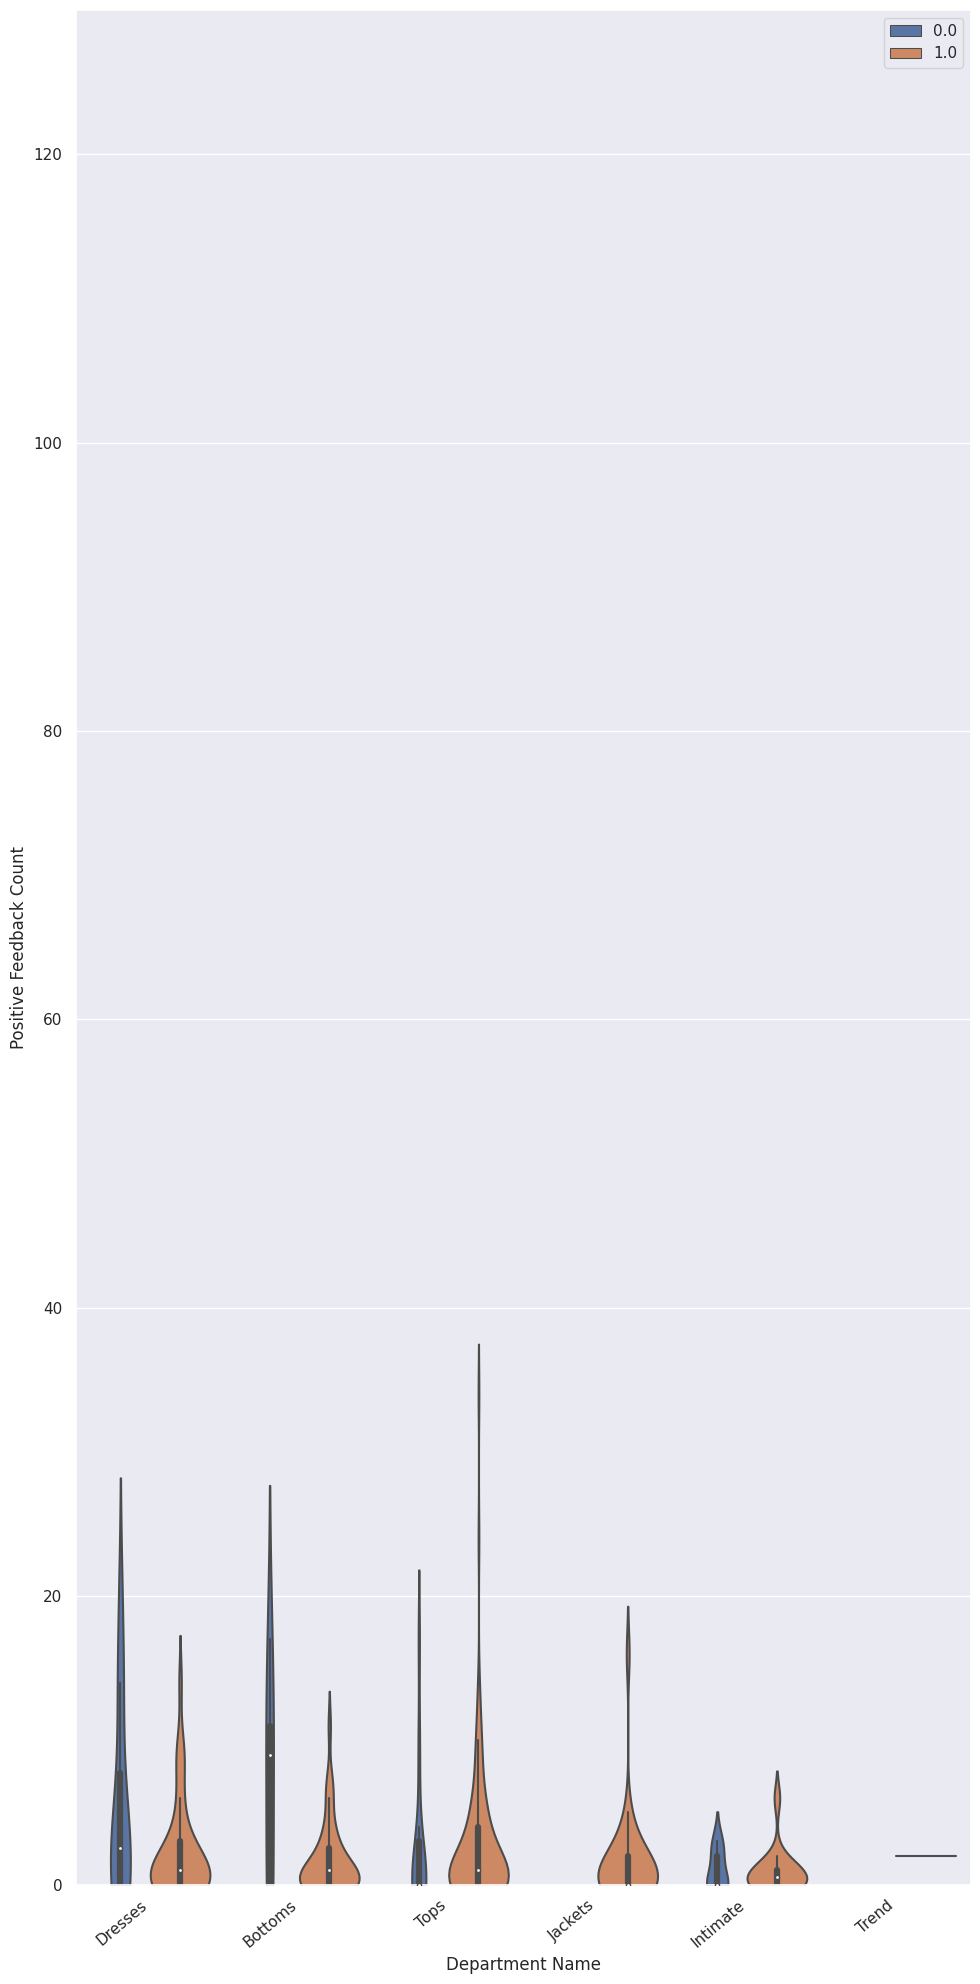

In [14]:
ax=sns.violinplot(x='Department Name',y='Positive Feedback Count',hue='Recommended IND',data=df,scale='count')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.legend(loc='upper right')
ax.set(ylim=(0, 130))
sns.set(rc={'figure.figsize':(10,10)})

In [16]:
print('Positive Feed Count by Recommendation')
print(df['Positive Feedback Count'].groupby(df['Recommended IND']).describe())

Positive Feed Count by Recommendation
                 count      mean       std  min  25%  50%  75%   max
Recommended IND                                                     
0.0               53.0  3.471698  5.524783  0.0  0.0  0.0  4.0  20.0
1.0              248.0  2.278226  3.912920  0.0  0.0  1.0  3.0  34.0


Giysiler, Ceketler ve dış giyim, incelemelere göre en olumlu geri bildirimleri aldık. İncelemelerin çok büyük bir çoğunluğu tavsiye edildi. Bir incelemeyi olumlu ve faydalı bulan kadınlar olduğunda, değer aralığı çok da uzak değildir. Görsel olarak, kategorilerin çoğu, veri kümesinin genel envantere bu kadar olumlu tepki vermesi nedeniyle önerilen incelemelerde daha fazla sayı gösteriyor.

Veri seti, metin analiziyle birlikte ilerlemek için iyi miktarda bilgi sunar, ancak bununla birlikte, olası yanlış yaş girişleri ve yanlış bilgi girme potansiyeli açısından bazı dezavantajlar vardır.

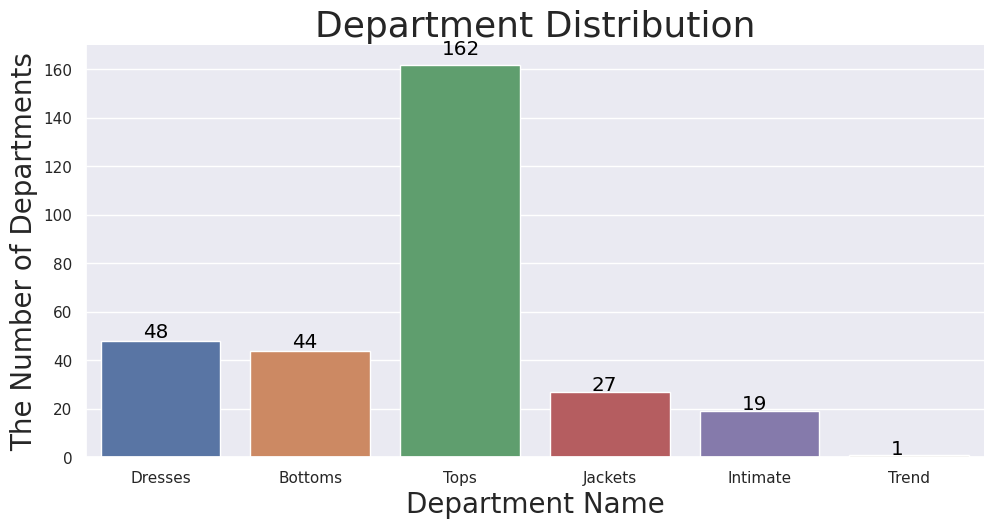

In [17]:
g = sns.catplot(data = df, x ="Department Name", kind='count', height=5, aspect=2)

plt.title('Department Distribution', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Departments", fontsize=20)

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.28,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

Yukarıdaki bar grafiğinde Top için yaklaşık 162 adet giriş var hemen ardında ise dresses için yaklaşık 48 giriş olduğu gözlemlenmektedir. Bunu takip eden 44 giriş ile bottoms olduğu görülmektedir. Böylece görüldüğü gibi sıralanmıştır.

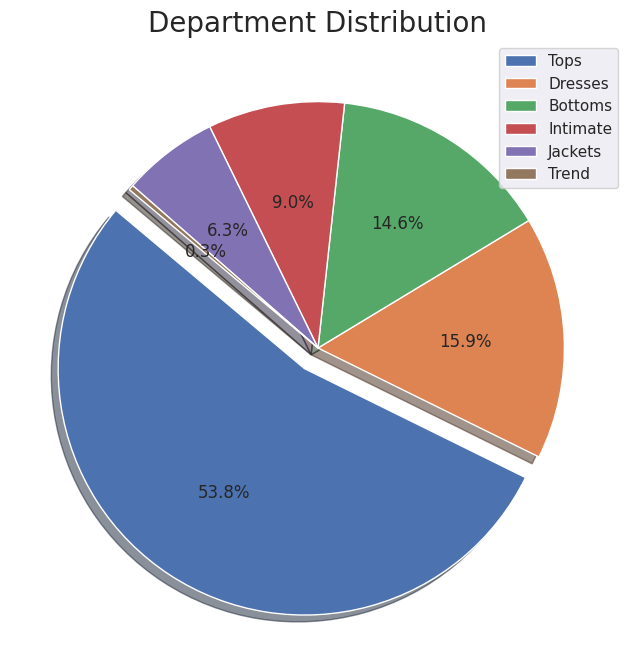

In [18]:
plt.figure(figsize=(8, 8))

explode = [0.1, 0, 0, 0, 0, 0]
plt.pie(df['Department Name'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['Tops', 'Dresses', 'Bottoms', 'Intimate', 'Jackets', 'Trend'])
plt.title('Department Distribution', fontsize=20)
plt.axis('off');

<Figure size 1500x800 with 0 Axes>

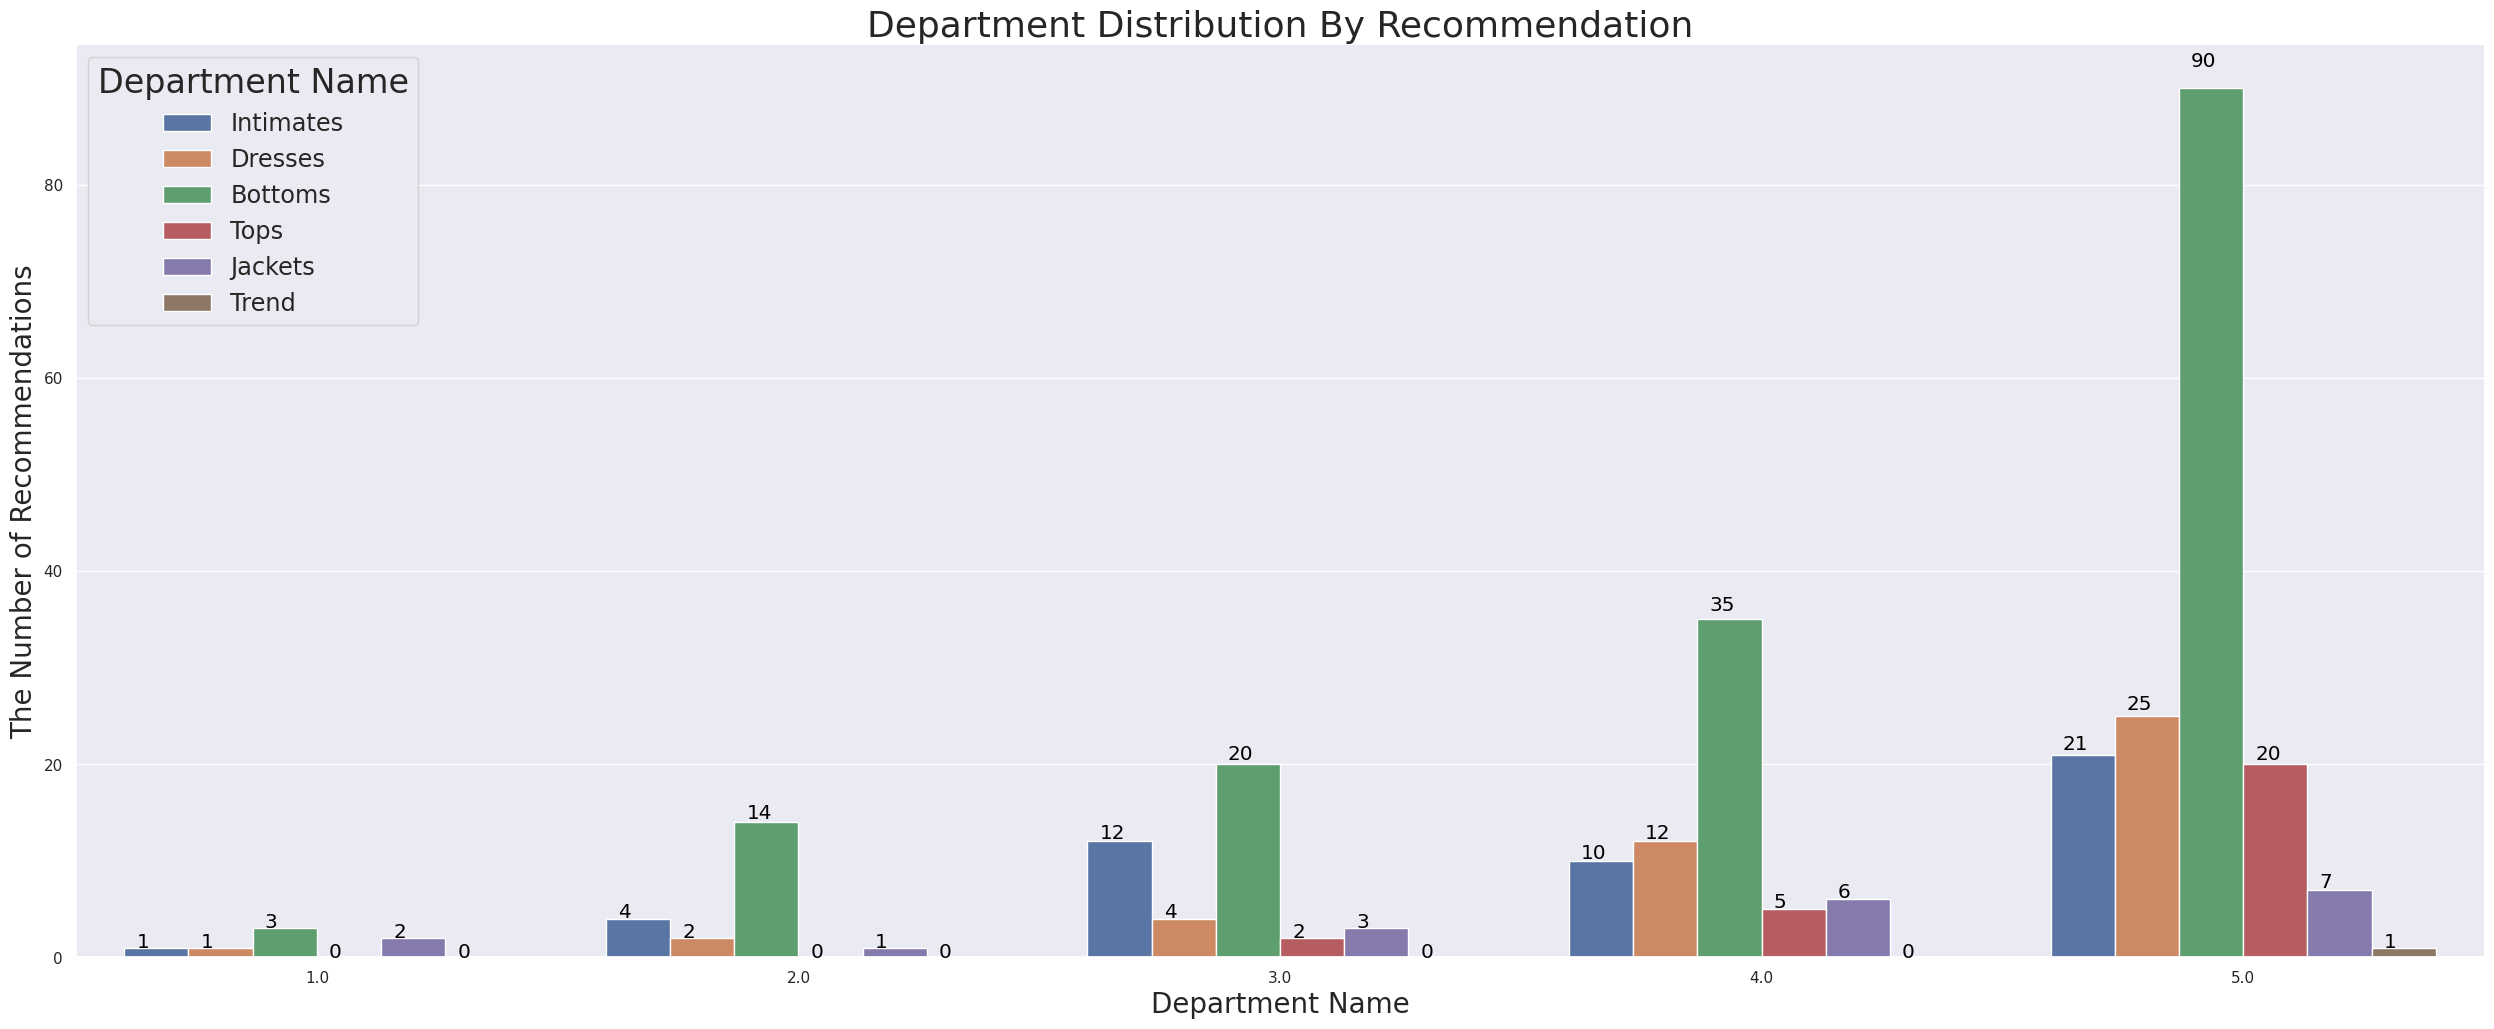

In [19]:
g = sns.catplot(data = df, x ="Rating", hue = "Department Name", kind='count', height=10, aspect=2.5, legend_out=False)

plt.title('Department Distribution By Recommendation', fontsize=26)
plt.xlabel("Department Name", fontsize=20)
plt.ylabel("The Number of Recommendations", fontsize=20)
plt.legend(title='Department Name', loc='upper left', labels=['Intimates', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'], fontsize='x-large', title_fontsize='24')
plt.figure(figsize=(15, 8))

ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025,
            p.get_height() * 1.025,
            '{0:.0f}'.format(p.get_height()),
            color='black', rotation='horizontal', size='large')

plt.show()

#Ratings
Ürünün tavsiye edilip edilmediğine göre puanların dağılımını çizelim.

Grafiklerde ilginç olan şey, ürünü tavsiye etmeyen insanların çoğunun ona 3 puan vermesidir.

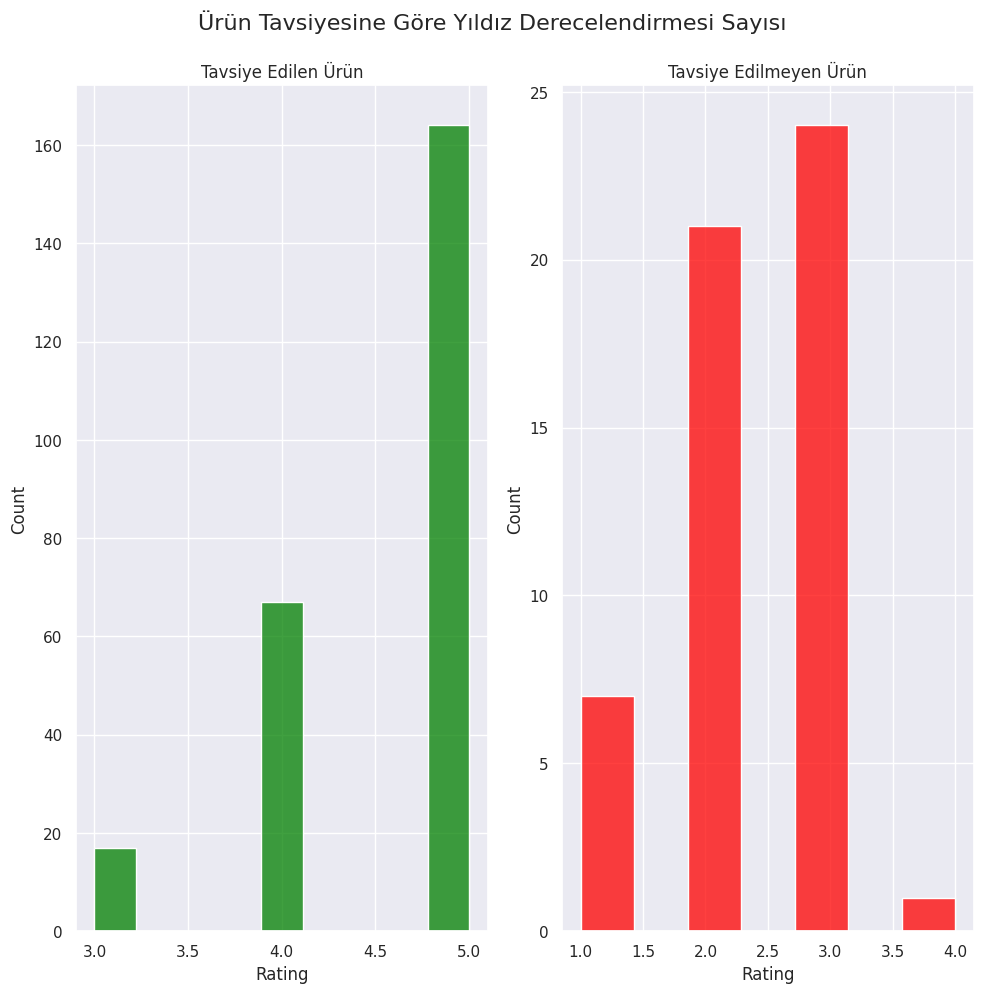

In [22]:
# Distribution of star ratings by whehter the reviewer recommends the product
recommended = df[df['Recommended IND'] == 1]
not_recommended = df[df['Recommended IND'] == 0]

plt.subplot(1, 2, 1)
sns.histplot(recommended['Rating'], color='green')
plt.title('Tavsiye Edilen Ürün')

plt.subplot(1, 2, 2)
sns.histplot(not_recommended['Rating'], color='red')
plt.title('Tavsiye Edilmeyen Ürün')
plt.suptitle('Ürün Tavsiyesine Göre Yıldız Derecelendirmesi Sayısı', fontsize=16, verticalalignment='center', horizontalalignment='center')
plt.tight_layout()
plt.show()

In [23]:
import plotly.express as px

In [24]:
px.scatter(df, x="Age", y="Positive Feedback Count", facet_row="Recommended IND", facet_col="Rating",trendline="ols",category_orders={"Rating": [1,2,3,4,5],'Recommended IND':[0,1]})

#Correlation Matris

In [25]:
rating = df.groupby('Rating').mean()
rating.corr()

<ipython-input-25-23fb0f592360>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Clothing ID,Age,Recommended IND,Positive Feedback Count
Clothing ID,1.000000,-0.316432,0.412699,-0.870965
Age,-0.316432,1.000000,0.619004,0.342085
Recommended IND,0.412699,0.619004,1.000000,-0.523142
Positive Feedback Count,-0.870965,0.342085,-0.523142,1.000000


<Axes: >

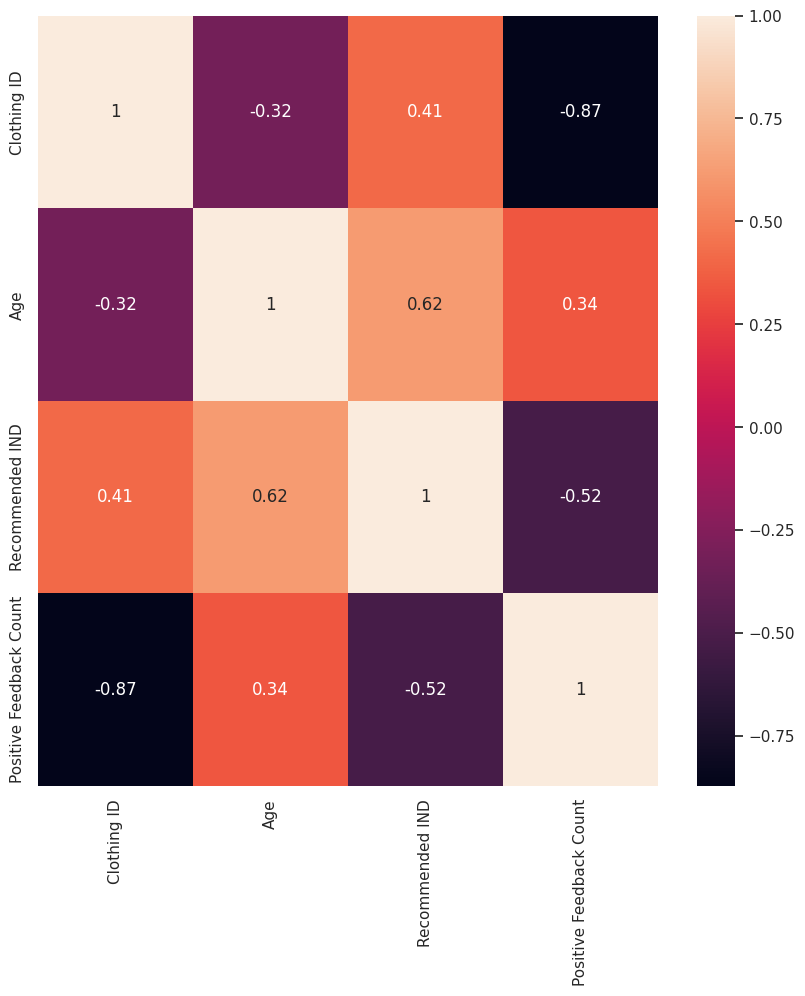

In [26]:
sns.heatmap(data=rating.corr(), annot=True)

Yukarıdaki korelasyon haritası, sütunlar arasında fazla bir korelasyon olmadığını göstermektedir. İnceleme uzunluğu ve olumlu geri bildirim sayısı gibi sütunlar biraz ilişkilidir. Ve negatif olan 0,93 sayısı, İnceleme Uzunluğu ile hiçbir şekilde ilişkili olmadığını gösterir. Yaş büyüdükçe inceleme süresi azalır.

#Biraz WordCloud oluşturalım!

In [27]:
import re

def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split()
    return( " ".join( words ))

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)|{'skirt', 'blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse'}

def create_cloud(rating):
    x= [i for i in rating]
    y= ' '.join(x)
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(15,7.5))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

Rating En İyi Kelimeler = 5

-love

-fit

-color

-size

-wear


Kadın kıyafetlerini tasarlarken dikkat edilmesi gereken kelimeler: comfortable, soft, beautiful, well made, detail, design, versatile

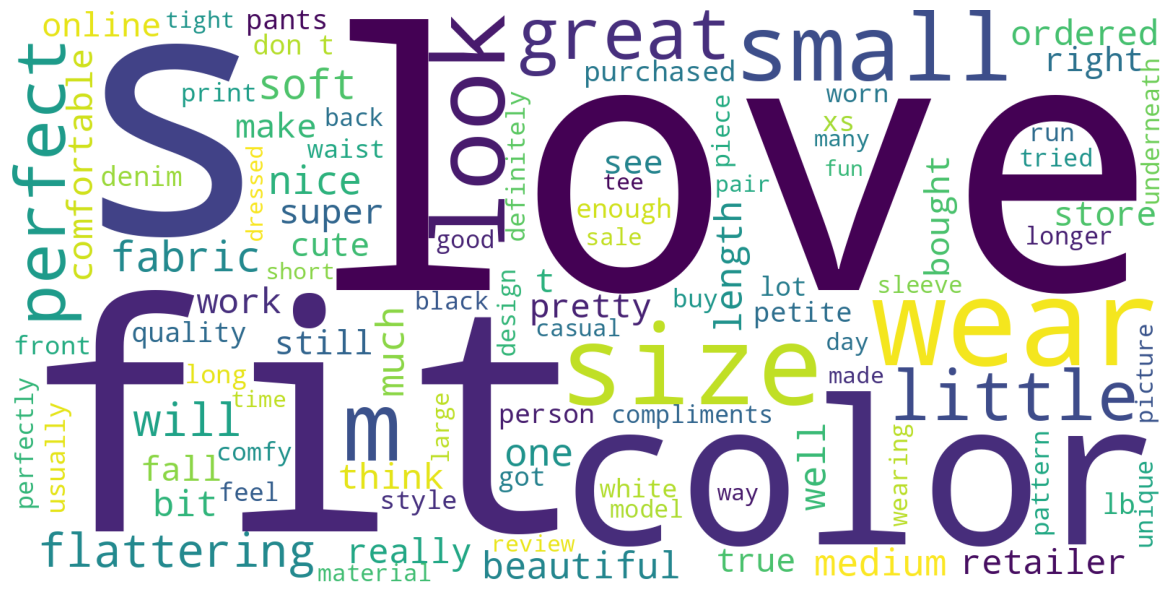

In [29]:
rating5= df[df['Rating']==5]['Review Text'].apply(clean_data)
create_cloud(rating5)

Rating En İyi Kelimeler = 4
love
color
fit
look

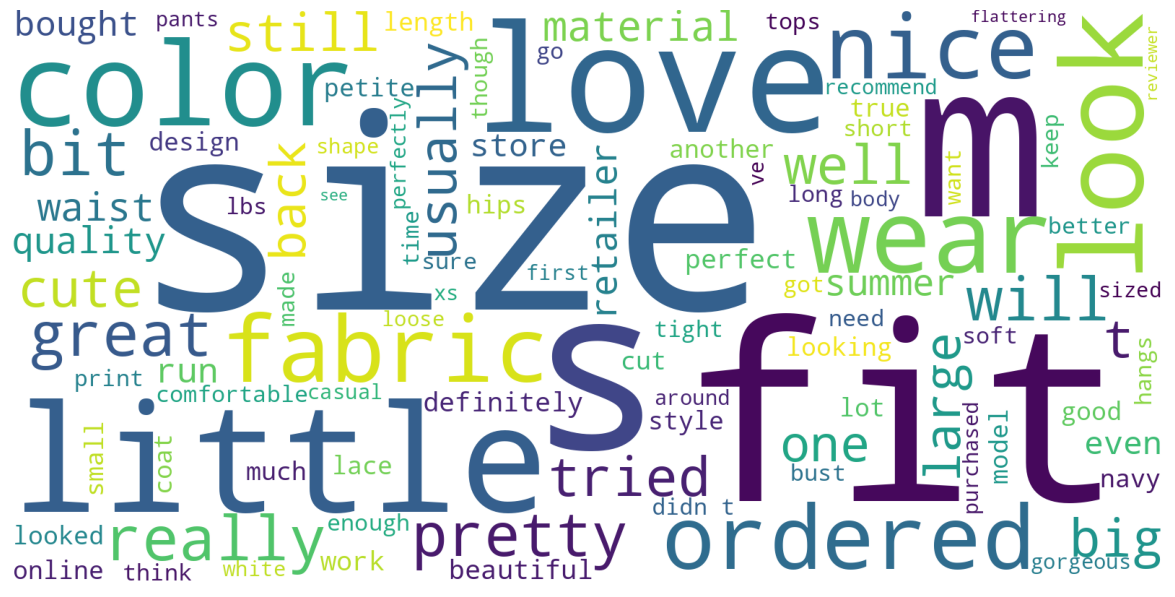

In [30]:
rating4= df[df['Rating']==4]['Review Text'].apply(clean_data)
create_cloud(rating4)

Rating En İyi Kelimeler = 2
look
fit
fabric
color

Gözlenen Negatif Kelimeler: tight, disappointed, going back

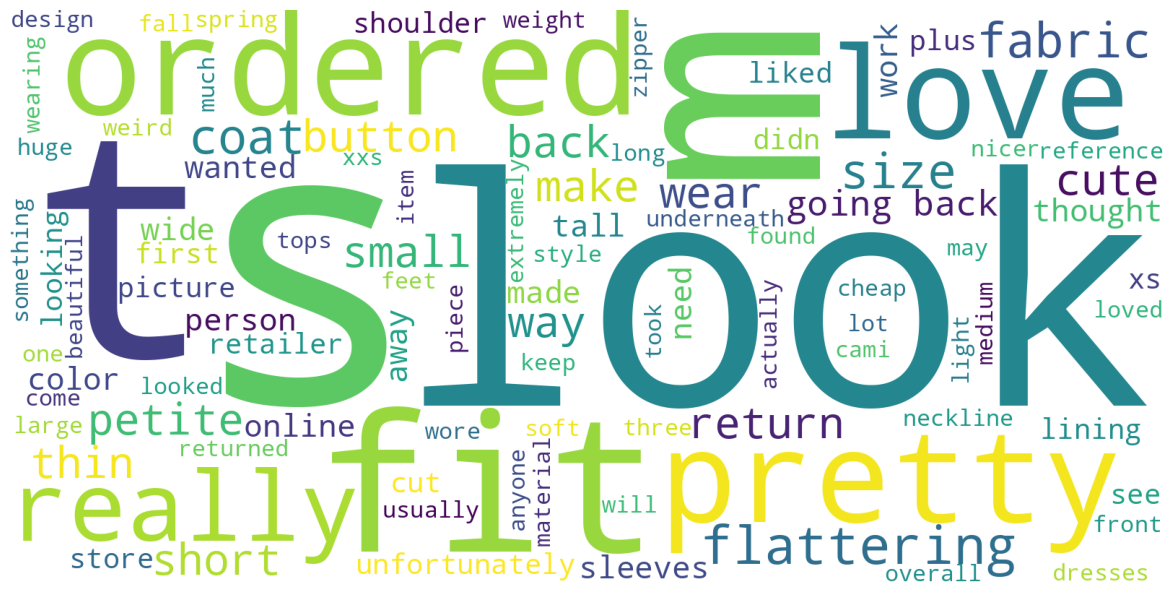

In [31]:
rating2= df[df['Rating']==2]['Review Text'].apply(clean_data)
create_cloud(rating2)

#METİN ANALİZİ
Yorumları inceledikten sonra, hepsinin doğası gereği benzerdir. Birçoğu renklerden, giysi bedenlerinden ve kumaşından bahsediyor. Yanlış yazılmış kelimeler var, ancak incelemelerin genel tarzı ve doğası, çok fazla temizleme ihtiyacı ile ilerlemek için tutarlıdır. Göze çarpan bir şey, incelemelerin bir karakter sınırına sahip olması ve bazılarının kesilmesidir.

#Orjinal metin

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Review Text']), axis=1)
df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']), axis=1)

<ipython-input-34-15d597898e35>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-34-15d597898e35>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




,count,mean,std,min,25%,50%,75%,max
Recommended IND,,,,,,,,
0.0,53.0,74.207547,30.727937,12.0,47.00,76.0,106.0,121.0
1.0,248.0,71.475806,30.632063,11.0,46.75,67.0,102.0,128.0


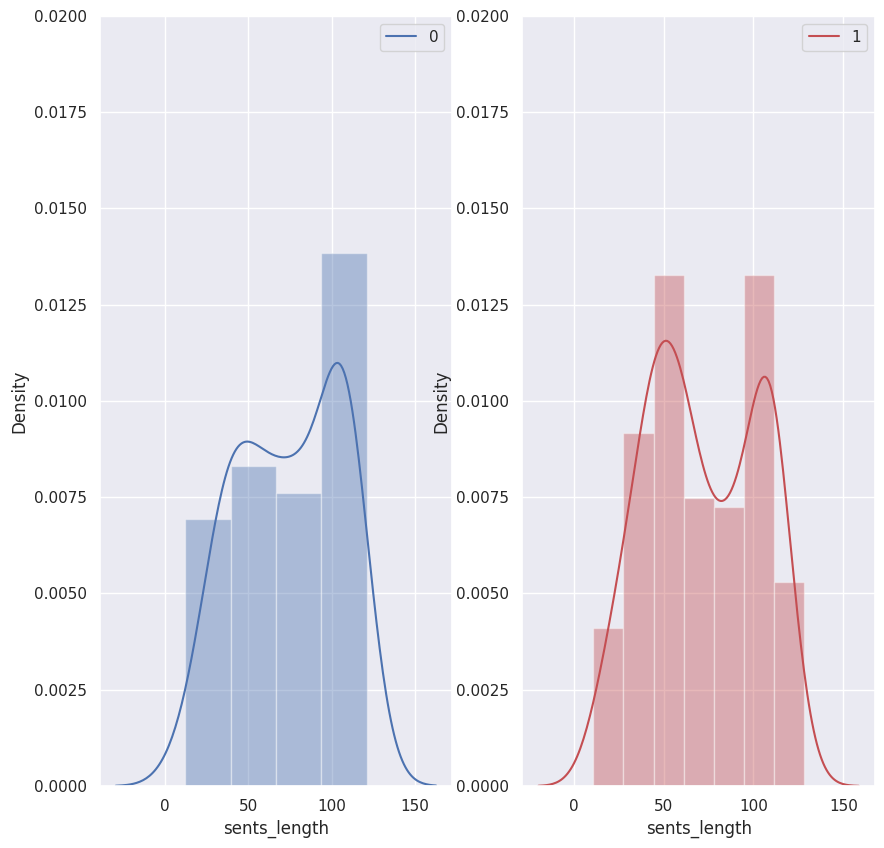

In [34]:
plt.subplot(1,2,1)
ax=sns.distplot(df[df['Recommended IND']==0]['sents_length'])
plt.legend(loc='upper right',labels=[0])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

plt.subplot(1,2,2)
ax=sns.distplot(df[df['Recommended IND']==1]['sents_length'],color='r')
plt.legend(loc='upper right',labels=[1])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

df['sents_length'].groupby(df['Recommended IND']).describe()

<ipython-input-35-27bdcba099a3>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-35-27bdcba099a3>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-35-27bdcba099a3>:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

,count,mean,std,min,25%,50%,75%,max
Rating,,,,,,,,
1.0,7.0,77.428571,34.597000,37.0,46.50,80.0,105.5,121.0
2.0,21.0,80.571429,30.991243,26.0,58.00,94.0,107.0,114.0
3.0,41.0,75.219512,30.749400,12.0,54.00,73.0,106.0,123.0
4.0,68.0,77.073529,28.216813,11.0,56.00,78.0,102.5,128.0
5.0,164.0,67.682927,31.001040,12.0,43.75,62.0,99.0,123.0


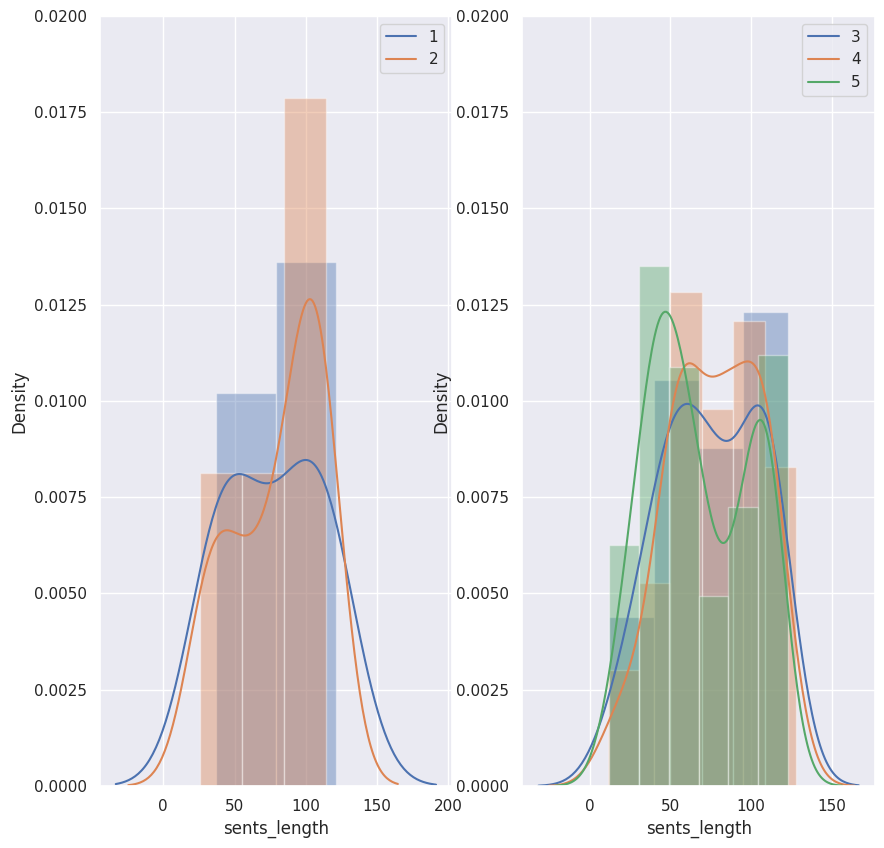

In [35]:
plt.subplot(1,2,1)
ax=sns.distplot(df[df['Rating']==1]['sents_length'])
ax=sns.distplot(df[df['Rating']==2]['sents_length'])
plt.legend(loc='upper right',labels=[1,2])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

plt.subplot(1,2,2)
ax=sns.distplot(df[df['Rating']==3]['sents_length'])
ax=sns.distplot(df[df['Rating']==4]['sents_length'])
ax=sns.distplot(df[df['Rating']==5]['sents_length'])
plt.legend(loc='upper right',labels=[3,4,5])
sns.set(rc={'figure.figsize':(10,10)})
ax.set_ylim(0,0.02)

df['sents_length'].groupby(df['Rating']).describe()

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
# Import stopwords with nltk. --Engellenecek kelimeleri nltk ile içe aktarın.
from nltk.corpus import stopwords
stop = stopwords.words('english')
import string
#apply lower case, stop words, and remove punctuation--küçük harf uygula, sözcükleri durdur ve noktalama işaretlerini kaldır
df['Review Text']=df['Review Text'].str.lower()
df['Review Text']=df['Review Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['Review Text']=df['Review Text'].str.replace('[{}]'.format(string.punctuation), '')

#Tokenize words by sentence
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['Review Text']), axis=1)
#Sentence Length
df['sents_length'] = df.apply(lambda row: len(row['tokenized_sents']), axis=1)

<ipython-input-39-02cceaed886b>:8: FutureWarning:

The default value of regex will change from True to False in a future version.



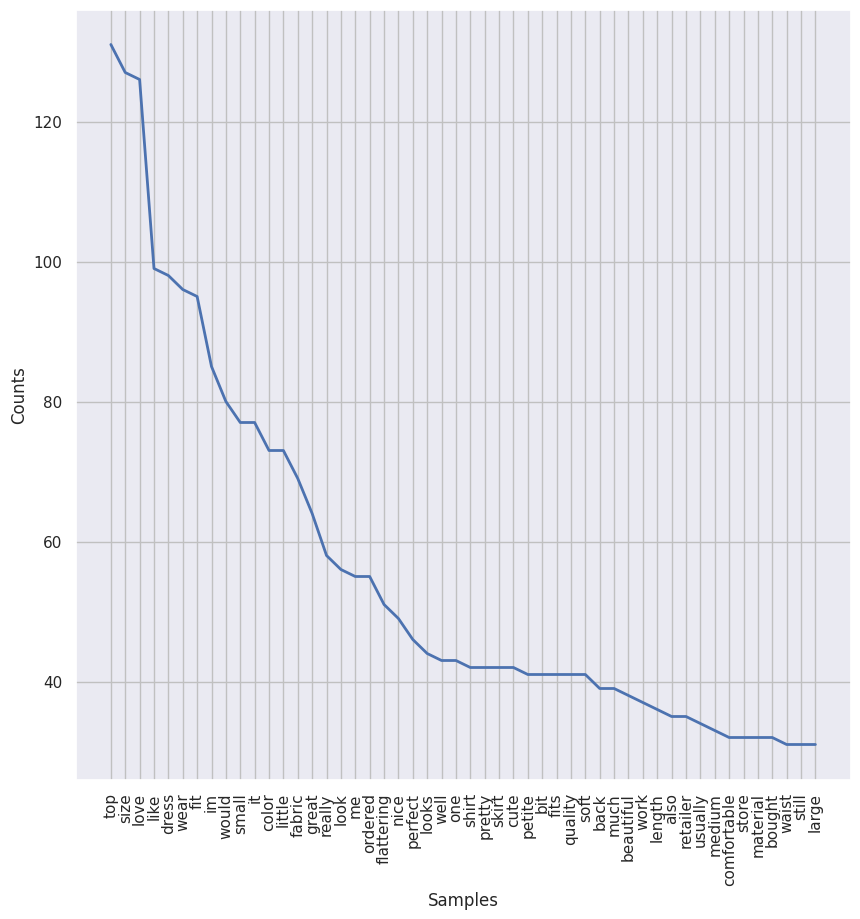

<Figure size 4000x100 with 0 Axes>

<Figure size 4000x100 with 0 Axes>

In [40]:
from nltk.probability import FreqDist
#Create list of token words
lists =  df['tokenized_sents']
words = []
for wordList in lists:
    words += wordList
#remove 50 most common words based on Brown corpus-- Birinci en yaygın kelime grubu
fdist = FreqDist(words)
mostcommon = fdist.most_common(50)
mclist = []
for i in range(len(mostcommon)):
    mclist.append(mostcommon[i][0])
# mclist contains second-most common set of words --ikinci en yaygın kelime grubunu içerir
words = [w for w in words if w in mclist]
# this will keep ALL occurrences of the words in mclist --bu, kelimelerin TÜM oluşumlarını mclist'te tutacaktır

# Frequency Distribution Plot
import matplotlib.pyplot as plt
fdist.plot(50,cumulative=False)
plt.show()
plt.figure(figsize=(40,1))

#PairPlot Gösterimi

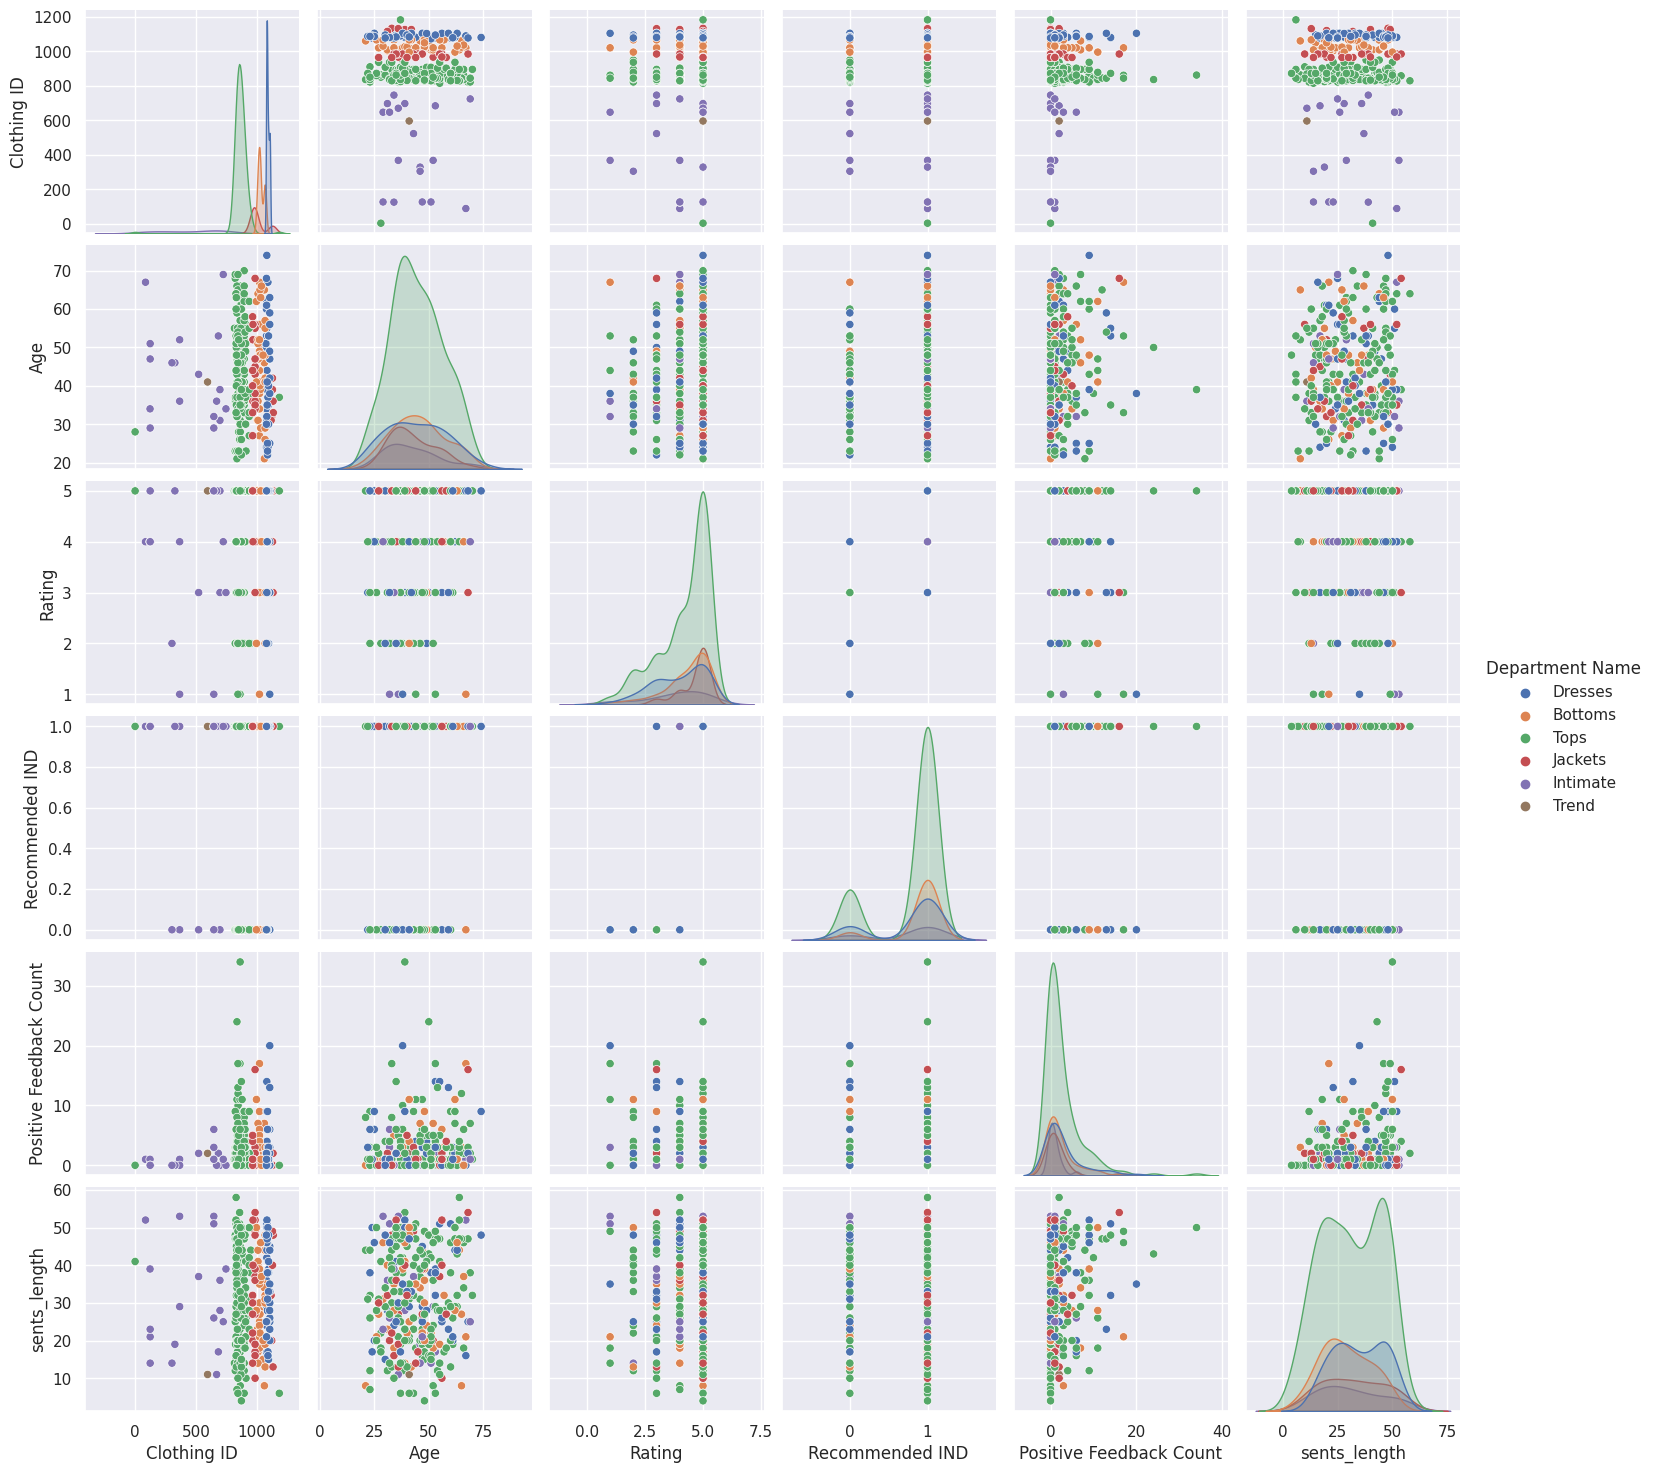

In [41]:
sns.pairplot(df,hue='Department Name')

#Özellik Çıkarma-Kelime Çantası

In [42]:
df = pd.read_excel('/content/drive/My Drive/E-Commerce Clothing Reviews.xlsx')
df.dropna(axis=0,inplace=True)
df.drop(['Unnamed: 0'],1,inplace=True)

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,3),max_features=250)
text_count= cv.fit_transform(df['Review Text'])
columns=cv.get_feature_names_out()
#combine countvectorizer features with original dataframe for supervised learning--denetimli öğrenme için sayıcı vektörleştirici özelliklerini orijinal veri çerçevesiyle birleştirin

df_n=pd.DataFrame(text_count.toarray(), columns=columns)
df_feat= pd.concat([df, df_n], axis=1)
df_feat=df_feat.dropna()
df_feat=pd.get_dummies(df_feat,columns=['Department Name'])
df_feat.shape

<ipython-input-42-6b90242684f2>:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



(233, 263)

#Train | Test & Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df["Review Text"]
y= df["Recommended IND"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [46]:

from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [47]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))

    plot_confusion_matrix(model, X_test, y_test, ax=ax)

#Count Vectorization

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

In [49]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [50]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

#1-Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.6, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [52]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


LOG MODEL
Test_Set
              precision    recall  f1-score   support

         0.0       0.46      0.55      0.50        11
         1.0       0.90      0.86      0.88        50

    accuracy                           0.80        61
   macro avg       0.68      0.70      0.69        61
weighted avg       0.82      0.80      0.81        61

Train_Set
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        42
         1.0       1.00      1.00      1.00       198

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



NameError: ignored

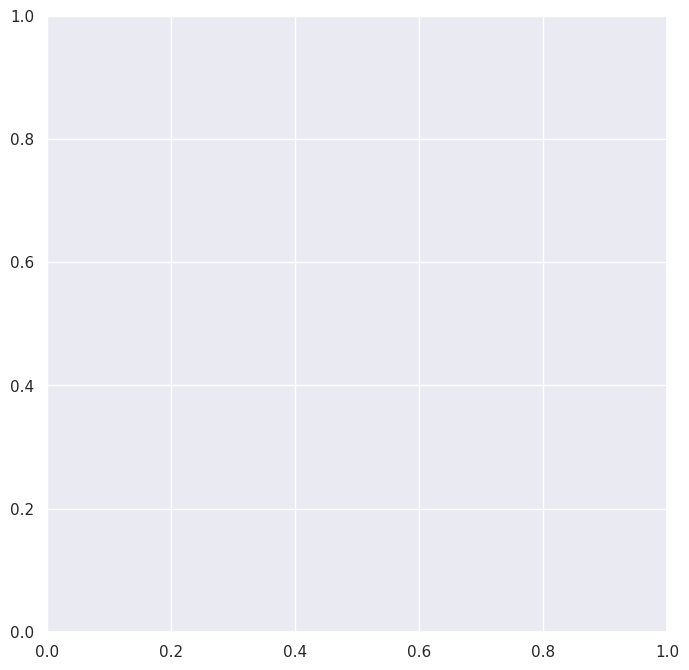

In [53]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

In [54]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    elif i == "accuracy":
        log_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8125

 precision-0          score for count : 0.5108333333333334

 recall-0             score for count : 0.4

 f1-0                 score for count : 0.41440781440781443

 precision-1          score for count : 0.8782447802642311

 recall-1             score for count : 0.898421052631579

 f1-1                 score for count : 0.8862385642539088



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging



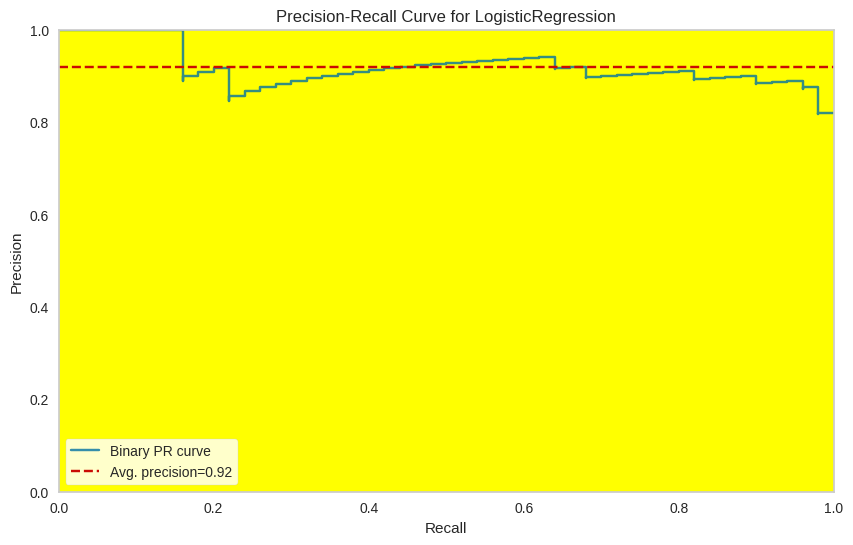

In [55]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
                            LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101),
                            classes=log.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

#2-Naive Bayes With Count Vectorizor

In [56]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [57]:

nb = MultinomialNB()
nb.fit(X_train_count, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

         0.0       1.00      0.09      0.17        11
         1.0       0.83      1.00      0.91        50

    accuracy                           0.84        61
   macro avg       0.92      0.55      0.54        61
weighted avg       0.86      0.84      0.78        61

Train_Set
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        42
         1.0       0.97      1.00      0.99       198

    accuracy                           0.97       240
   macro avg       0.99      0.93      0.95       240
weighted avg       0.98      0.97      0.97       240



NameError: ignored

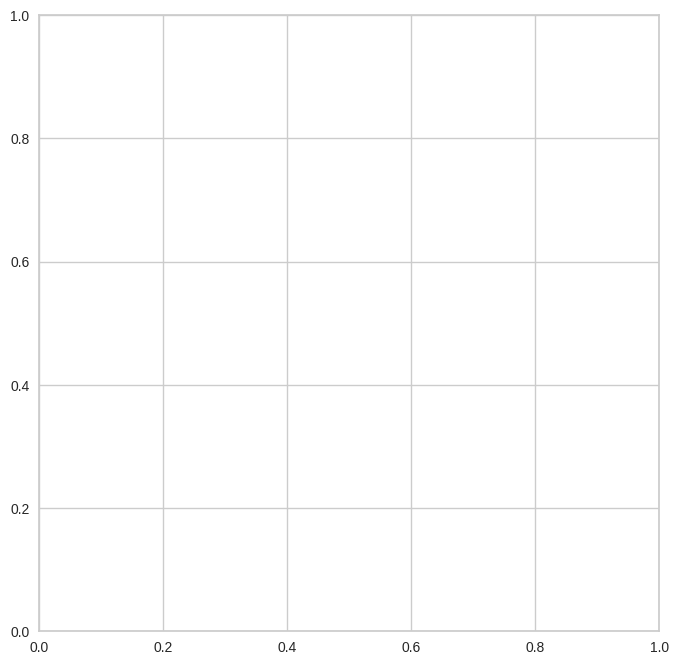

In [58]:
print("NB MODEL")

eval(nb, X_train_count, X_test_count)

In [59]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_count_rec = scores
    elif i == "f1-1":
        nb_count_f1 = scores
    elif i == "accuracy":
        nb_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8458333333333332

 precision-0          score for count : 0.6166666666666666

 recall-0             score for count : 0.23500000000000001

 f1-0                 score for count : 0.32761904761904764

 precision-1          score for count : 0.8584603801995107

 recall-1             score for count : 0.975

 f1-1                 score for count : 0.9127191205466871



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging



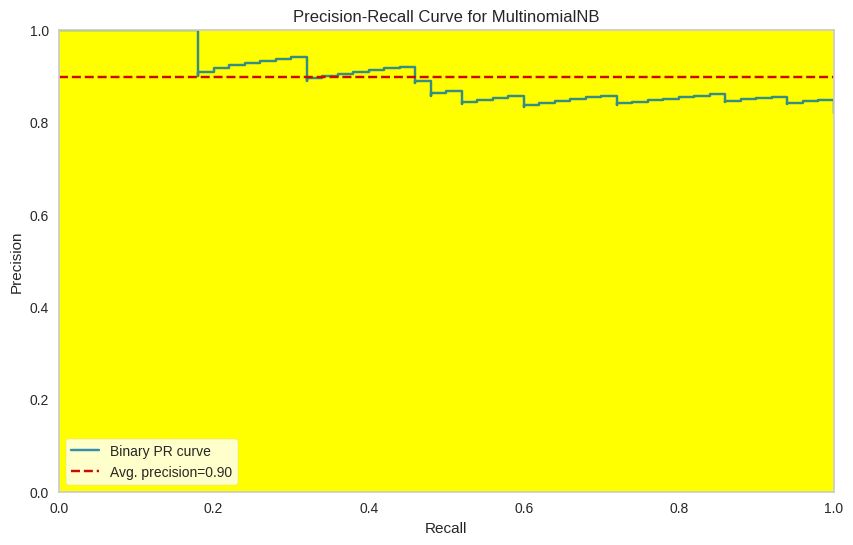

In [60]:
viz = PrecisionRecallCurve(
                            MultinomialNB(),
                            classes=nb.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [61]:
nb_AP_count = viz.score_

#3-Support Vector Machine (SVM) With Count Vectorizor

In [62]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

SVC MODEL
Test_Set
              precision    recall  f1-score   support

         0.0       0.40      0.55      0.46        11
         1.0       0.89      0.82      0.85        50

    accuracy                           0.77        61
   macro avg       0.65      0.68      0.66        61
weighted avg       0.80      0.77      0.78        61

Train_Set
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        42
         1.0       1.00      0.99      0.99       198

    accuracy                           0.99       240
   macro avg       0.98      0.99      0.99       240
weighted avg       0.99      0.99      0.99       240



NameError: ignored

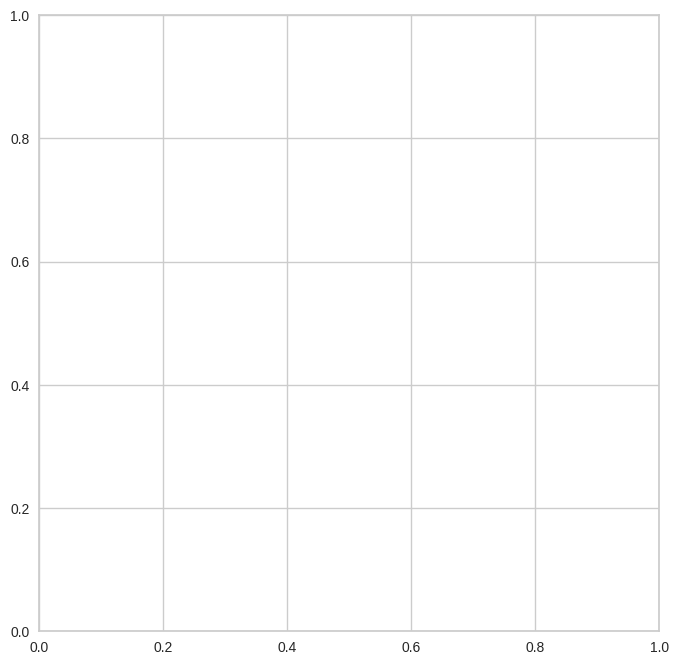

In [63]:
print("SVC MODEL")

eval(svc, X_train_count, X_test_count)

In [64]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    elif i == "accuracy":
        svc_count_acc = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8

 precision-0          score for count : 0.4470238095238096

 recall-0             score for count : 0.475

 f1-0                 score for count : 0.4464135864135864

 precision-1          score for count : 0.8879668534080298

 recall-1             score for count : 0.868421052631579

 f1-1                 score for count : 0.8764479755750616



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging



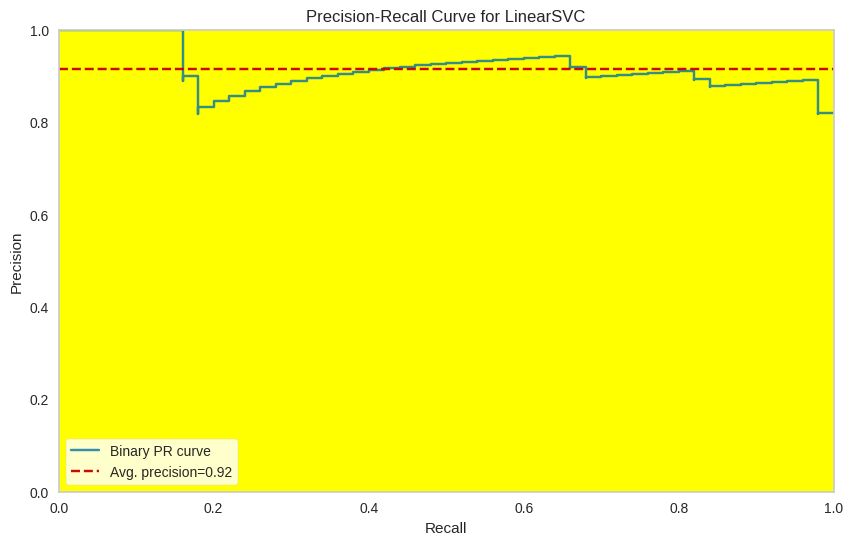

In [65]:
viz = PrecisionRecallCurve(
                            LinearSVC(C=0.01, class_weight="balanced", random_state=101),
                            classes=svc.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

#4-Random Forest With Count Vectorizer

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [67]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced")
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    elif i == "accuracy":
        rf_count_acc= scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8333333333333334



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/

 precision-0          score for count : 0.2

 recall-0             score for count : 0.045

 f1-0                 score for count : 0.07333333333333333

 precision-1          score for count : 0.8320652173913045

 recall-1             score for count : 1.0

 f1-1                 score for count : 0.9082351756770362



/usr/local/lib/python3.10/dist-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning:

micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging



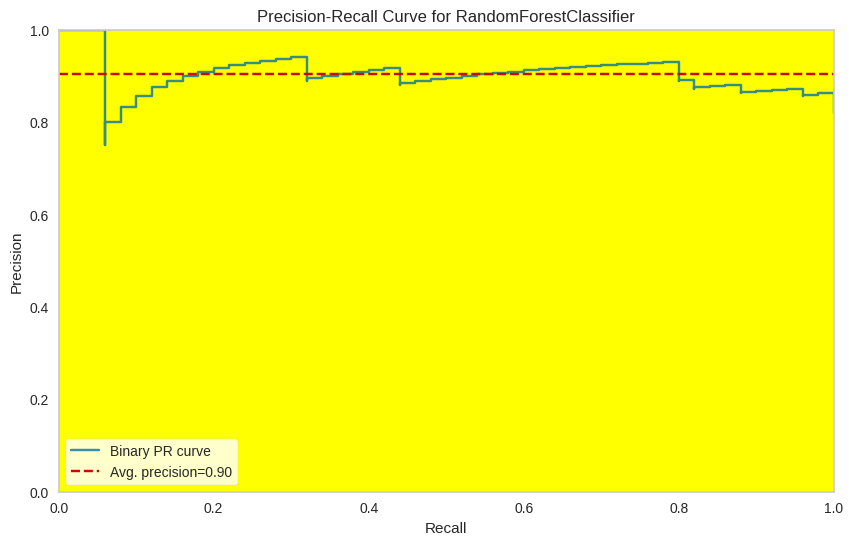

In [68]:
viz = PrecisionRecallCurve(
                            RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
                            classes=rf.classes_,
                            per_class=True,
                            cmap="Set1"
                           )

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('yellow')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

#MODELLERİN KARŞILAŞTIRILMASI
Modelleri F1 Score, Accuracy ve Recall score olarak karşılaştıralım


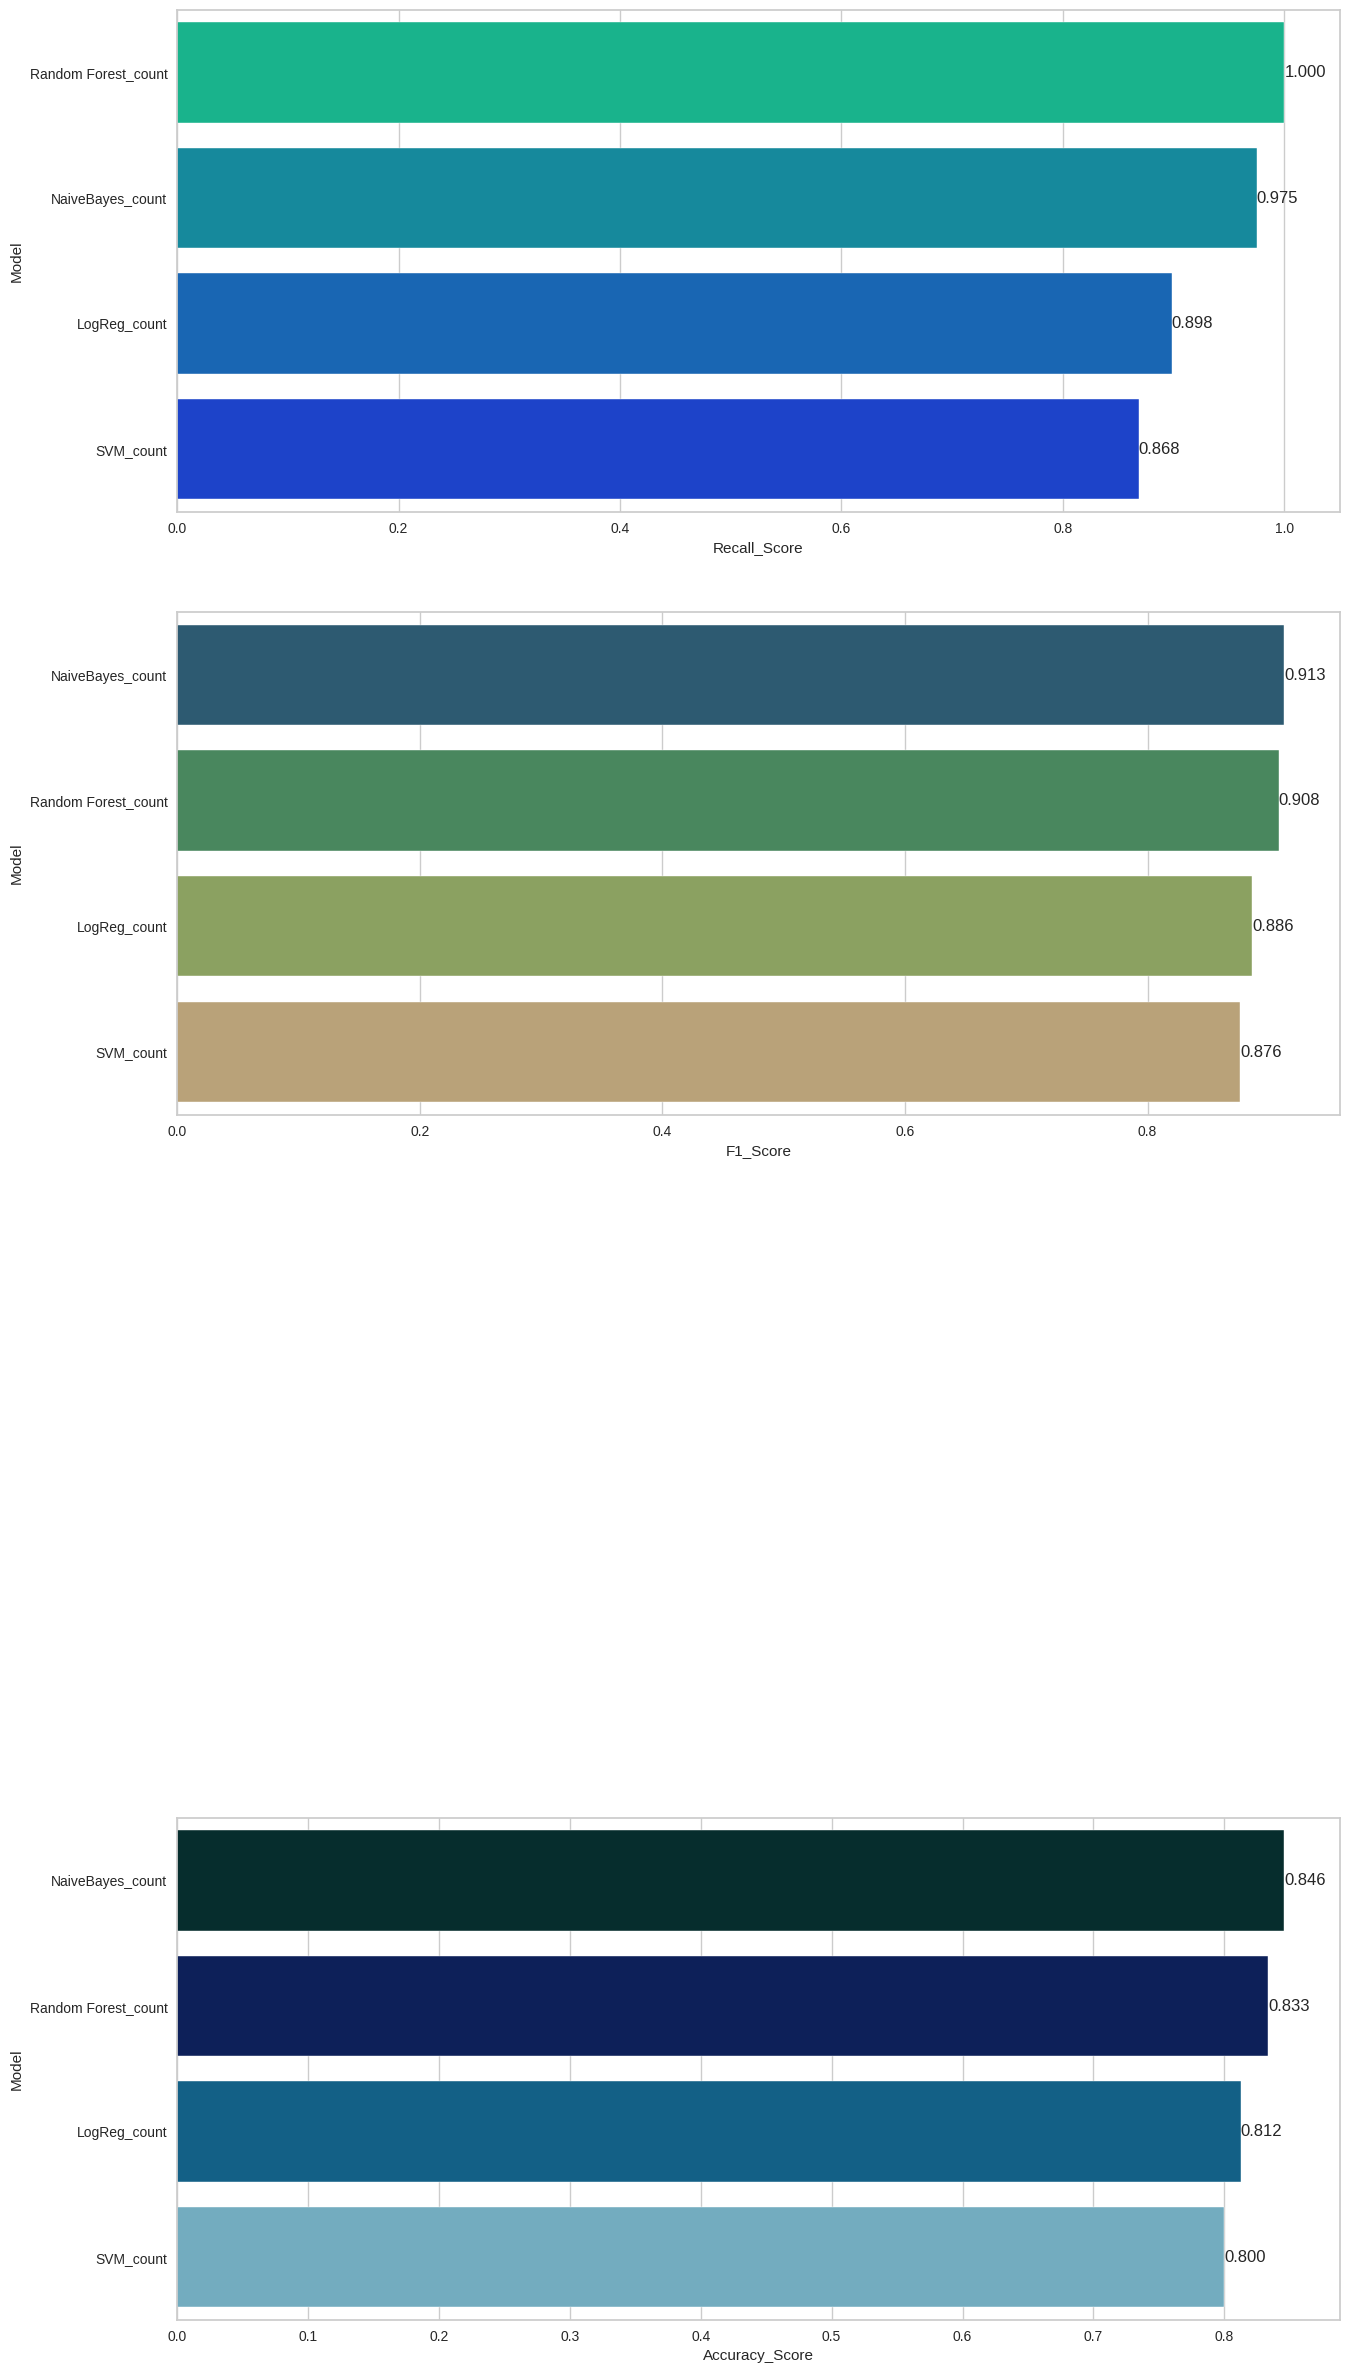

In [69]:
compare = pd.DataFrame({"Model": ["LogReg_count", "NaiveBayes_count",  "SVM_count", "Random Forest_count",
                                 ],

                        "F1_Score": [log_count_f1, nb_count_f1, svc_count_f1, rf_count_f1,
                                             ],

                        "Recall_Score": [log_count_rec, nb_count_rec, svc_count_rec, rf_count_rec
                                         ],
                        "Accuracy_Score": [log_count_acc, nb_count_acc, svc_count_acc, rf_count_acc
                                           ],
                     })

def labels(ax):

    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment

plt.figure(figsize=(15,30))
plt.subplot(411)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="winter_r")
labels(ax)

plt.subplot(412)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="gist_earth")
labels(ax)

plt.subplot(414)
compare = compare.sort_values(by="Accuracy_Score", ascending=False)
ax=sns.barplot(x="Accuracy_Score", y="Model", data=compare, palette="ocean")
labels(ax)

plt.show();

#Word2Vec model

In [70]:
import spacy

In [71]:
nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser'])

In [72]:
def cleaning(doc): #the lemmatizing function
    txt = [token.lemma_ for token in doc if not token.is_stop]
    if len(txt) > 2:
        return ' '.join(txt)

In [73]:
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['Review Text'])

In [74]:
from time import time

In [75]:
t = time()

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_process=-1)]

print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.06 mins


In [76]:
df = pd.DataFrame({'clean': txt})

df.shape

(301, 1)

In [77]:
import gensim
from gensim.models import Word2Vec

In [78]:
sent = [row.split() for row in df['clean']] #splitting the columns into the correct format

In [79]:
print(sent[:10])

[['high', 'hope', 'dress', 'want', 'work', 'initially', 'order', 'petite', 'small', 'usual', 'size', 'find', 'outrageously', 'small', 'small', 'fact', 'zip', 'reorder', 'petite', 'medium', 'ok', 'overall', 'half', 'comfortable', 'fit', 'nicely', 'half', 'tight', 'layer', 'somewhat', 'cheap', 'net', 'layer', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sew', 'directly', 'zipper', 'c'], ['love', 'love', 'love', 'jumpsuit', 'fun', 'flirty', 'fabulous', 'time', 'wear', 'great', 'compliment'], ['shirt', 'flattering', 'adjustable', 'tie', 'perfect', 'length', 'wear', 'legging', 'sleeveless', 'pair', 'cardigan', 'love', 'shirt'], ['love', 'tracy', 'reese', 'dress', 'petite', 'foot', 'tall', 'usually', 'wear', 'p', 'brand', 'dress', 'pretty', 'package', 'lot', 'dress', 'skirt', 'long', 'overwhelm', 'small', 'frame', 'stranger', 'alteration', 'shorten', 'narrow', 'skirt', 'away', 'embellishment', 'garment', 'love', 'color', 'idea', 'style', 'work', 'return', 'dress'], ['ade', 'basket', 'h

In [80]:
t = time()

model = gensim.models.Word2Vec(sent, min_count=1,vector_size= 50,workers=3, window =3, sg = 1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.0 mins


In [81]:
model.wv.most_similar(positive=["dress"])

[('white', 0.9972918629646301),
 ('work', 0.9972633123397827),
 ('fabric', 0.9972580075263977),
 ('great', 0.997184693813324),
 ('right', 0.9971819519996643),
 ('like', 0.9971633553504944),
 ('look', 0.9971600770950317),
 ('soft', 0.9969996809959412),
 ('go', 0.9969688057899475),
 ('shirt', 0.9968305826187134)]

In [82]:
model.wv.most_similar(positive=["skirt"])

[('want', 0.9973596334457397),
 ('fit', 0.9969314336776733),
 ('wear', 0.9968274235725403),
 ('great', 0.9967548847198486),
 ('size', 0.9966243505477905),
 ('make', 0.9966059327125549),
 ('try', 0.9964509010314941),
 ('pair', 0.9964490532875061),
 ('waist', 0.9963163137435913),
 ('style', 0.9962649941444397)]

In [83]:
model.wv.most_similar(positive=["favorite"])

[('flatter', 0.9917195439338684),
 ('short', 0.9910798072814941),
 ('b', 0.9910455346107483),
 ('waist', 0.9908904433250427),
 ('go', 0.9908894896507263),
 ('love', 0.9908657670021057),
 ('lace', 0.9908650517463684),
 ('flattering', 0.9908140301704407),
 ('pattern', 0.9906556606292725),
 ('layer', 0.9905338883399963)]

İki kelime ne kadar benzerlik gösteriyor bunu karşılaştıralım.

In [84]:
model.wv.similarity("little", 'petite')

0.9954264

In [85]:
model.wv.similarity("pencil", 'skirt')

0.97202015

Hangi kelime diğerleriyle uymuyor buna göz atalım.

In [86]:
model.wv.doesnt_match(['skirt', 'dress', 'book'])

'book'